# Dataset and attack specification 

In [1]:
import pickle 
from library.metrics import plot_layers_metrics
dataset="ember"
attack="Emb-att"

In [2]:
if dataset=="ember":
    selected_layers=[" layer 1"," layer 4"]
    layer_number=[0,0,0,1,1,1]
    node_id=[40,42,6,13,27,29]
    acc_or=94.88
    acc_un_a=0.05
    
elif dataset=="cuckoo":
    selected_layers=[" layer 0"," layer 1"]
    layer_number=[0,0,0,1,1,1]
    node_id=[3,27,16,7,13,1]
    acc_or=95.4
    acc_un_a=52.58
elif dataset=="mnist":
    selected_layers=[" layer 0"]
    layer_number=[0,0,0,0,0,0]
    node_id=[35,63,25,39,71,94]
    acc_or=97.7
    acc_un_a=5.3


# Frequency of Activations Per Layer plot  (Figure 5 in the paper)

In [3]:
labels = ["Benign",attack]
with open('./data/data_layers'+dataset+'.pickle', 'rb') as handle:
    data_layers= pickle.load(handle)
ben_vals_freqs,ben_vals_attrs,ben_vals_acts,adv_vals_attrs,adv_vals_acts,adv_vals_freqs=data_layers

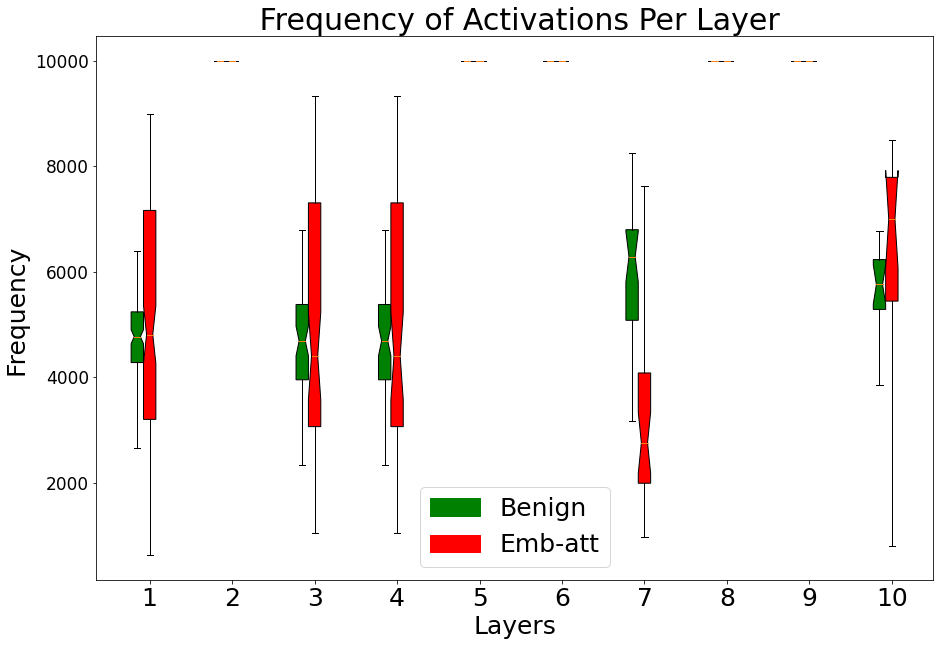

In [4]:
datasets = [data for data in list(ben_vals_freqs.values())[:1]]+[data for data in adv_vals_freqs.values()]
plot_layers_metrics(datasets,labels,"Frequency "," Frequency of Activations Per Layer")

# Average Activatons Per LayerPer Layer plot (Figure 5 in the paper)

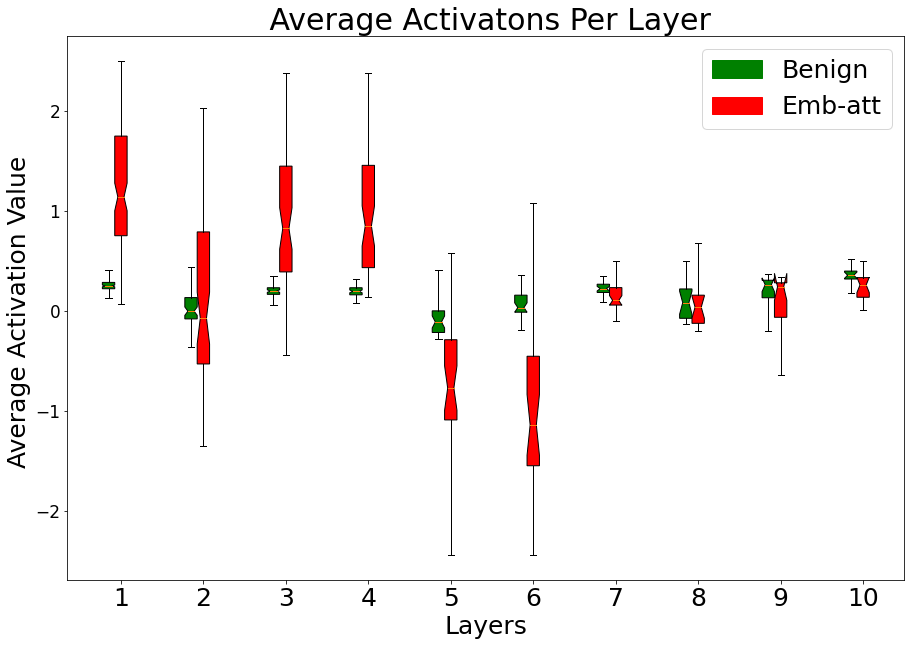

In [5]:
datasets = [data for data in list(ben_vals_acts.values())[:1]]+[data for data in adv_vals_acts.values()]
plot_layers_metrics(datasets,labels,"Average Activation Value "," Average Activatons Per Layer")

#  Average Attributions Per Layer plot (Figure 5 in the paper)

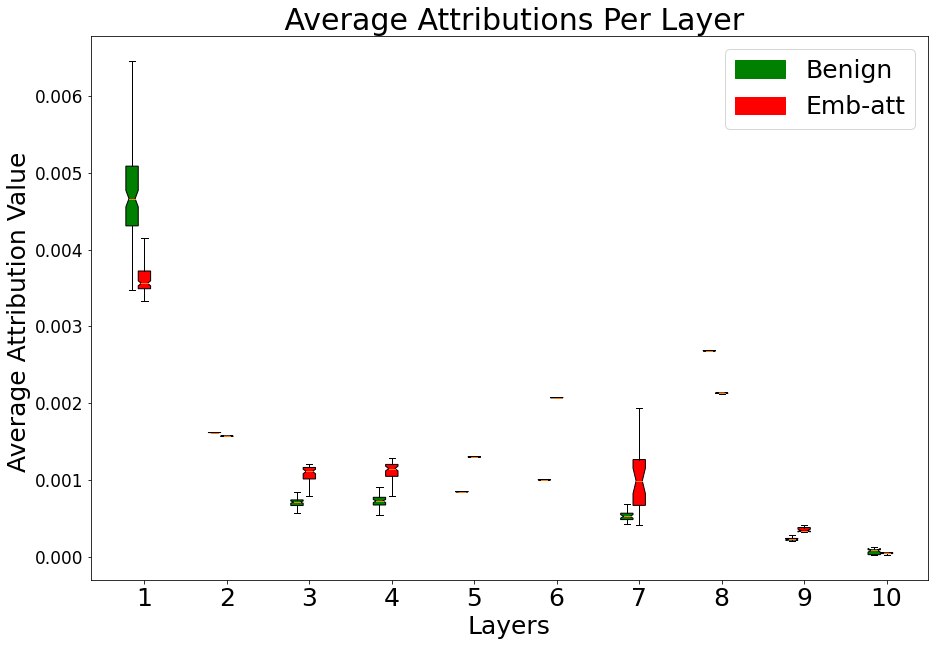

In [6]:
datasets = [data for data in list(ben_vals_attrs.values())[:1]]+[data for data in adv_vals_attrs.values()]
plot_layers_metrics(datasets,labels,"Average Attribution Value "," Average Attributions Per Layer")

In [7]:
with open('./data/layers_act_adv'+dataset+'.pickle', 'rb') as handle:
    layers_act_adv= pickle.load(handle)
with open('./data/layers_act'+dataset+'.pickle', 'rb') as handle:
    layers_act= pickle.load(handle)

# Density Before Actions Plot (Figure 9 (a) in the paper)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


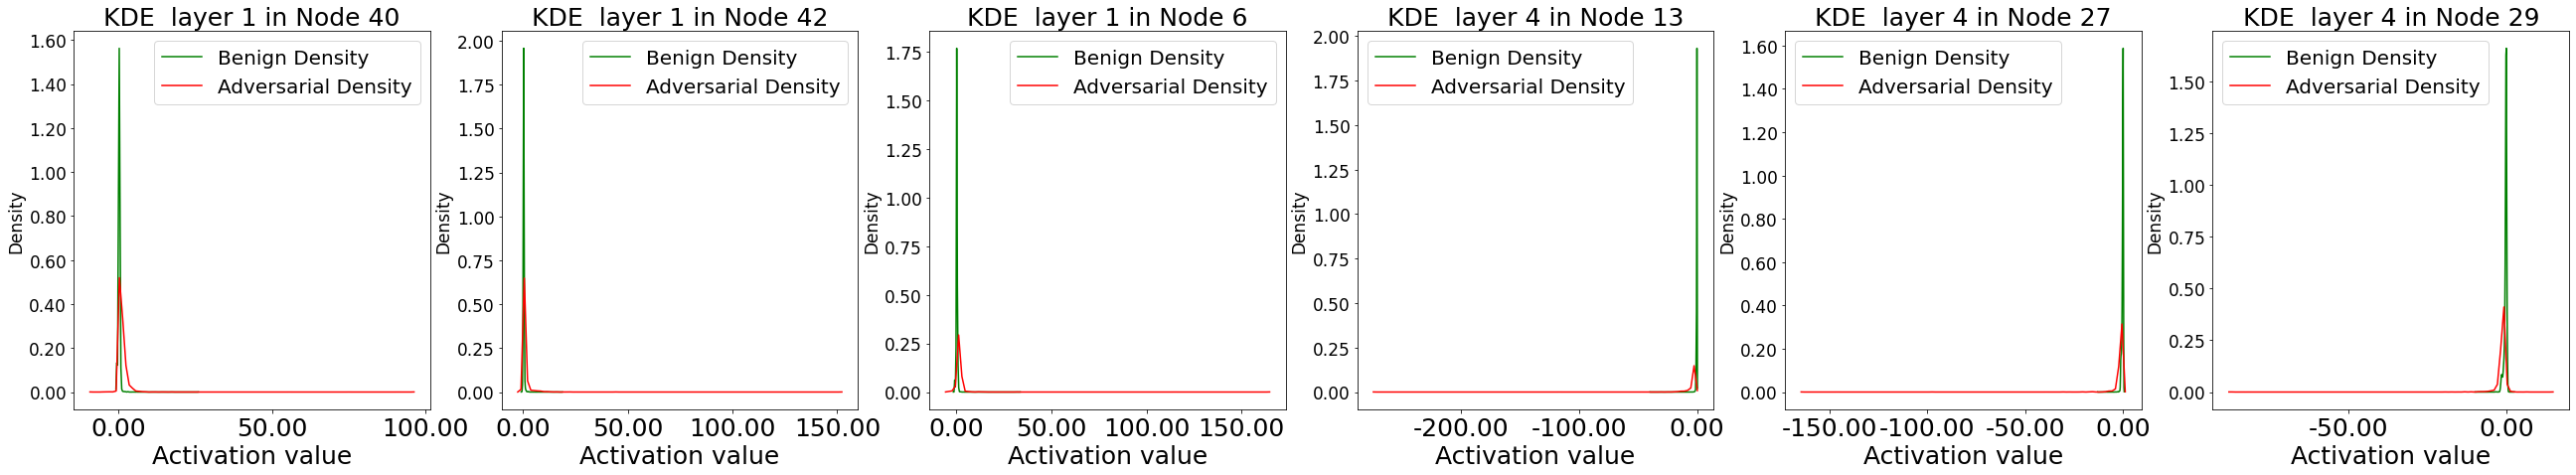

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#for layer_number in range(len(selected_layers)):
#num_rows = (len(layers_act_std[selected_layers[layer_number]])//5) +1
num_cols = 6

fig, axes = plt.subplots(1, num_cols,figsize=(45, 7))
axes = axes.flatten()

#jump=len(layers_act_std[selected_layers[layer_number]])//50
for i in range(len(axes)):
    ax=axes[i]
    # Generate sample data (replace this with your own dataset)
    data_ben =layers_act[selected_layers[layer_number[i]]][node_id[i]]
    data_adv =layers_act_adv[selected_layers[layer_number[i]]][node_id[i]]
    data_ben=data_ben.detach().numpy()
    data_adv=data_adv.detach().numpy()
    # Reshape the data to a column vector
    data_ben = data_ben.reshape(-1, 1)
    data_adv = data_adv.reshape(-1, 1)
    # Fit KDE model
    kde_ben = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde_adv = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde_ben.fit(data_ben)
    kde_adv.fit(data_adv)
    x_vals_ben = np.linspace(min(data_ben), max(data_ben), 100)
    x_vals_adv= np.linspace(min(data_adv), max(data_adv), 100)
    log_density_ben = kde_ben.score_samples(x_vals_ben)
    log_density_adv = kde_adv.score_samples(x_vals_adv)
    density_values_ben = np.exp(log_density_ben)
    density_values_adv = np.exp(log_density_adv)
    """
    # Find local maxima indices
    local_maxima_indices = argrelextrema(density_values, np.greater)[0]
    if len(local_maxima_indices)==0:
        local_maxima_indices=[np.argmax(density_values)]
    elif density_values[local_maxima_indices].max()<np.argmax(density_values):
        local_maxima_indices = np.append(local_maxima_indices, np.argmax(density_values))

    # Parametrize the window size based on the ratio of density
    window_ratios = 0.95

    # Extract the region around each peak with neighbors having a density ratio > 0.8
    peaks_regions = []

    for index in local_maxima_indices:
        # Check if all neighboring values have a density ratio > 0.8
        peaks_region=x_vals[(density_values> window_ratios * density_values[index]) & (density_values< density_values[index])]
        peaks_regions.append(peaks_region)

    # Flatten the list of regions
    """
    ax.plot(x_vals_ben, density_values_ben, color='green', label='Ben Density')
    ax.plot(x_vals_adv, density_values_adv, color='red', label='Adv Density')
    #ax.scatter(x_vals[local_maxima_indices], density_values[local_maxima_indices], color='red', label='Peaks')

    # Set plot labels and title
    ax.set_title('KDE '+str(selected_layers[layer_number[i]])+' in Node '+ str(node_id[i]),fontsize=25)#+ "number of peaks "+str(len(local_maxima_indices)) )
    ax.set_xlabel('Activation value',fontsize=25)
    #ax.xticks(fontsize=20)
    #ax.yticks(fontsize=20)
    ax.set_ylabel('Density',fontsize=17)
    def format_func(value, tick_number):
    # Convert the tick value to string without scientific notation
        return f'{value:.2f}'
    ax.tick_params(axis='x', labelsize=25)  # Set the font size for the x-axis tick labels
    ax.tick_params(axis='y', labelsize=17) 
    # Apply custom formatter to both x and y axes
    ax.xaxis.set_major_formatter(FuncFormatter(format_func))
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Display legend
    ax.legend(['Benign Density','Adversarial Density'], fontsize=20)
    #plot_act(layers_act[selected_layer][sorted_lists[-(i+1)*jump][1]],ax,std_score=sorted_lists[-(i+1)*jump][0])
#plt.savefig("Ember_before"+".pdf")
plt.show()


In [9]:
with open('./data/alpha_output_'+dataset+'.pickle', 'rb') as handle:
    alpha_output= pickle.load(handle)

# Model Enhancement Per iteration plot figure  (Figure 8 and 4 in the paper)

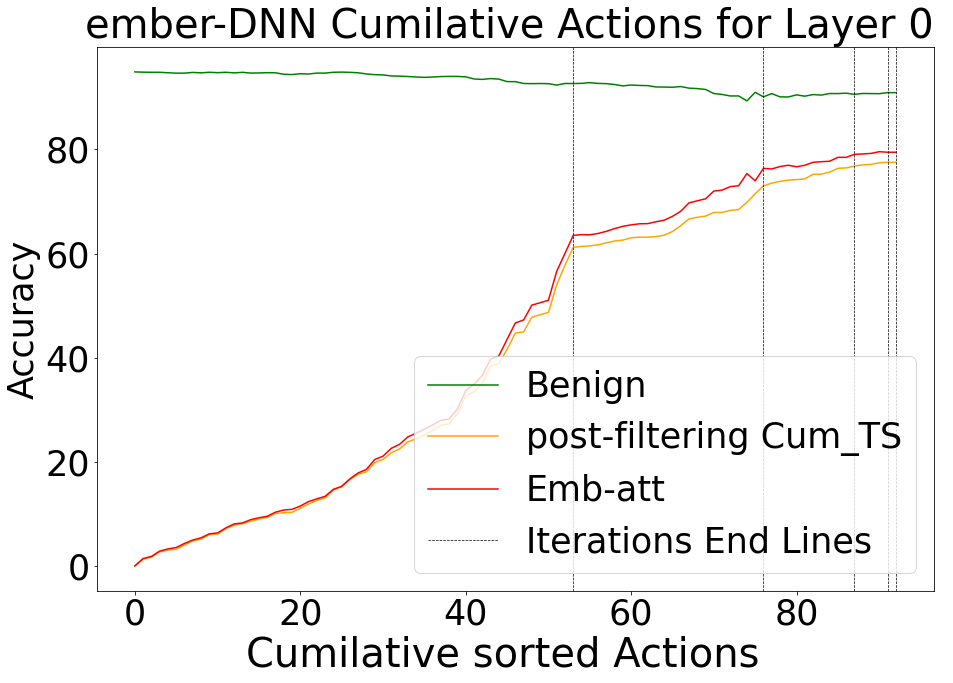

In [10]:
metrics=alpha_output[" layer 0"][1][-3]
import matplotlib.pyplot as plt
cumla_tr=0
ben_start=acc_or
adv_start=acc_un_a
cumla_tr_off=[cumla_tr]
cumla_tr_postive=[cumla_tr]
ben_acc_list=[acc_or]
adv_cum_list=[acc_un_a]
counter=0
iteration_lines=[]
plt.figure(figsize=(15, 10))
for i,metric in enumerate(metrics):

    for j,val in enumerate(metric[0]):
        
        if val<0:
            if  i+1==len(metrics):
                cumla_tr_off.append(cumla_tr+val)
                cumla_tr_postive.append(cumla_tr)
                ben_acc_list.append(ben_acc_list[-1])
                adv_cum_list.append(adv_cum_list[-1])
        else:
            cumla_tr+=val
            ben_acc_list.append(metric[1][j])
            adv_cum_list.append(metric[2][j])
            cumla_tr_postive.append(cumla_tr)
            cumla_tr_off.append(cumla_tr)
            counter+=1
    iteration_lines.append(counter)
    
    


plt.plot(range(len(ben_acc_list[:counter+1])), [float(i) for i in ben_acc_list[:counter+1] ],label="Benign",color="green")
plt.plot(range(len(cumla_tr_postive[:counter+1])), cumla_tr_postive[:counter+1],label="post-filtering Cumu_TS",color="orange")
#plt.plot(range(len(metric[1])+1), cumla_tr_off,label="Over all trade-off",color="blue")
plt.plot(range(len(adv_cum_list[:counter+1])),[float(i) for i in adv_cum_list[:counter+1] ],label=attack,color="red")
for j in iteration_lines:
    plt.axvline(x=j, color='Black', linestyle='dashed',label="Iterations End Lines",linewidth=0.7)
#plt.plot(range(len(ov_ben_fl)), [float(i) for i in ov_ben_fl ],label="acc_ben")
plt.xlabel('Cumilative sorted Actions  ', fontsize=40)
plt.ylabel('Accuracy', fontsize=35)
plt.legend(["Benign","post-filtering Cum_TS",attack ,"Iterations End Lines"], fontsize=35)
adv_start=metric[2][-1]
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)
ben_start=metric[1][-1]
plt.title(dataset+'-DNN Cumilative Actions for Layer 0 ', fontsize=40)
plt.show()

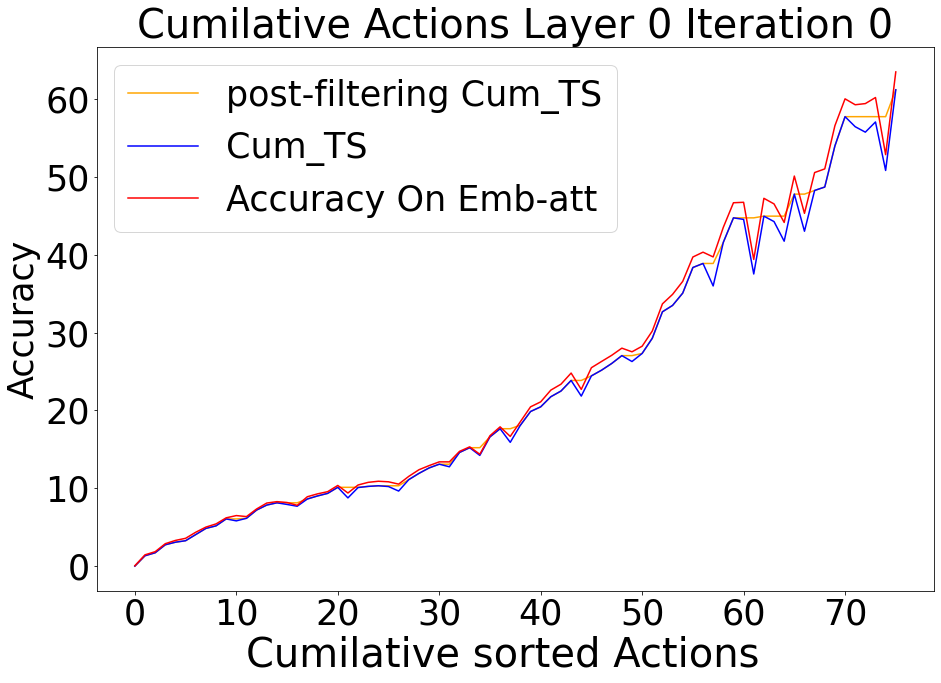

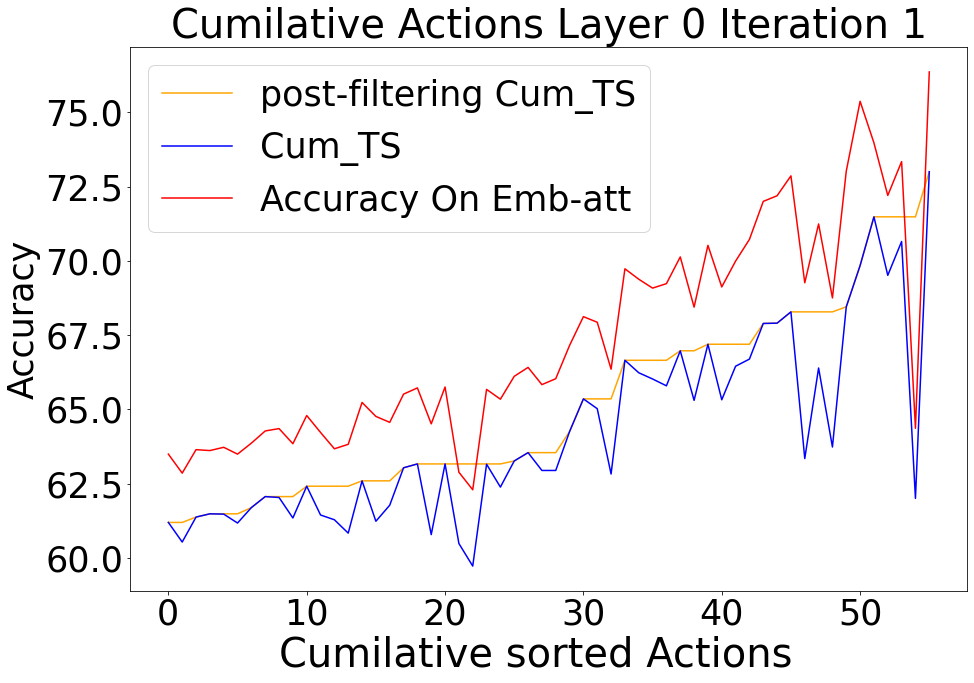

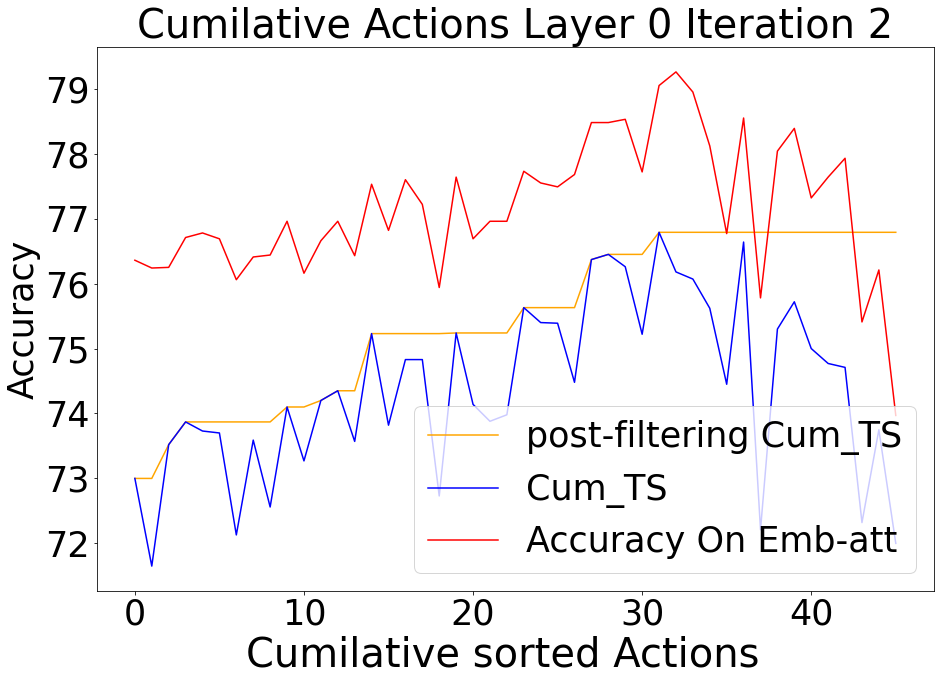

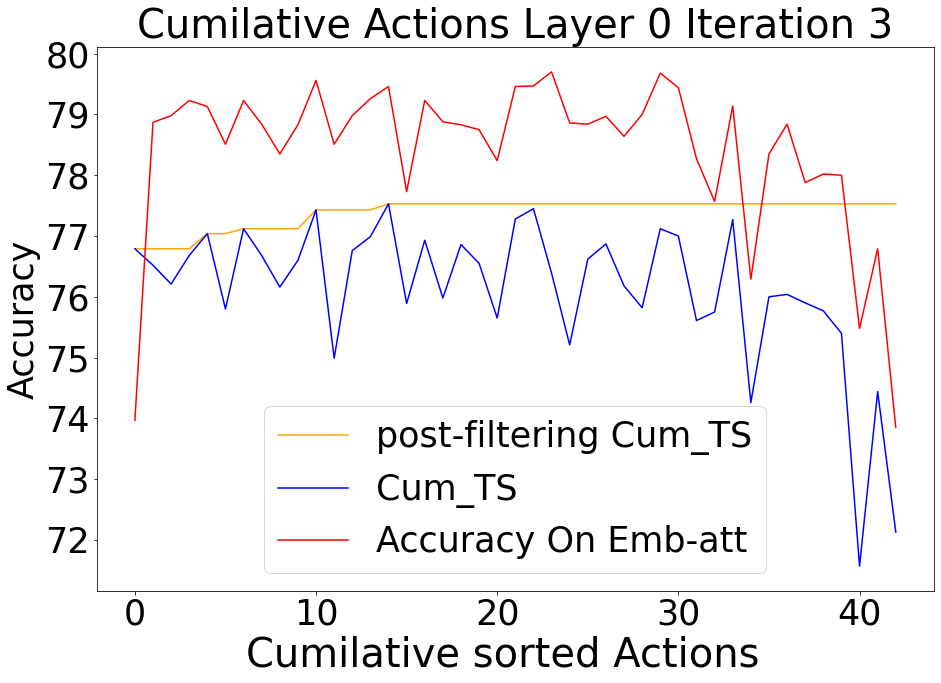

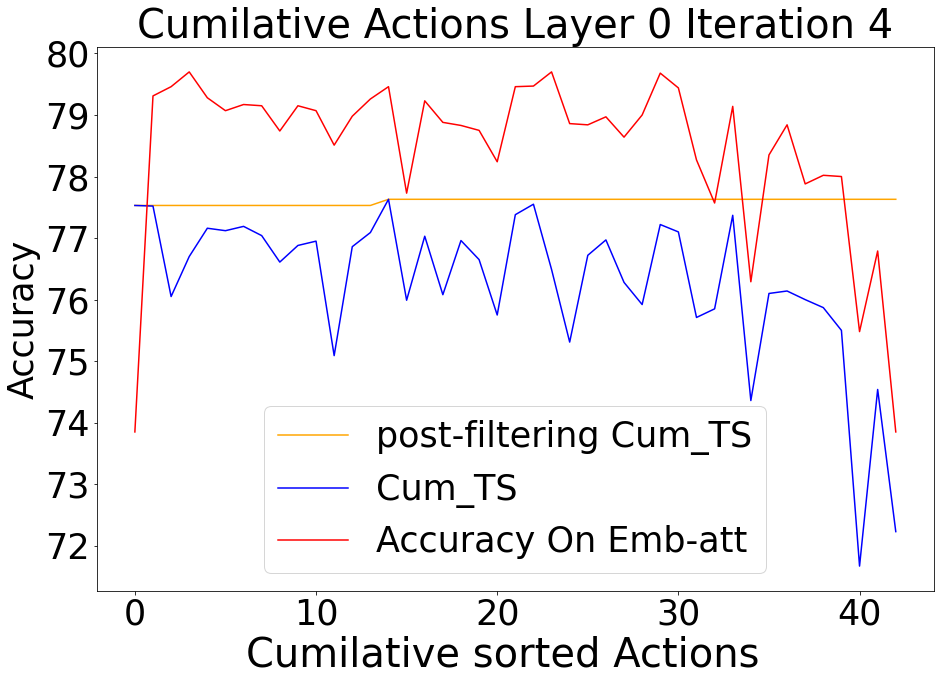

In [11]:
import matplotlib.pyplot as plt
cumla_tr=0
ben_start=acc_or
adv_start=acc_un_a
for i,metric in enumerate(metrics):
    cumla_tr_off=[cumla_tr]
    cumla_tr_postive=[cumla_tr]
    for val in metric[0]:
        if val<0:
            cumla_tr_off.append(cumla_tr+val)
            cumla_tr_postive.append(cumla_tr)
        else:
            cumla_tr+=val
            cumla_tr_postive.append(cumla_tr)
            cumla_tr_off.append(cumla_tr)
    plt.figure(figsize=(15, 10))
    #plt.plot(range(len(metric[1])+1), [ben_start]+[float(i) for i in metric[1] ],label="ben_accuracy",color="green")
    plt.plot(range(len(metric[1])+1), cumla_tr_postive,label="post-filtering Cumu_TS",color="orange")
    plt.plot(range(len(metric[1])+1), cumla_tr_off,label="TS",color="blue")
    plt.plot(range(len(metric[2])+1), [adv_start]+[float(i) for i in metric[2] ],label="Accuracy On "+attack,color="red")
    #plt.plot(range(len(ov_ben_fl)), [float(i) for i in ov_ben_fl ],label="acc_ben")
    plt.xlabel('Cumilative sorted Actions  ', fontsize=40)
    plt.ylabel('Accuracy', fontsize=35)
    plt.legend(["post-filtering Cum_TS","Cum_TS","Accuracy On "+attack ,], fontsize=35)
    adv_start=metric[2][-1]
    plt.yticks(fontsize=35)
    plt.xticks(fontsize=35)
    ben_start=metric[1][-1]
    plt.title('Cumilative Actions Layer 0 Iteration '+str(i), fontsize=40)
    plt.show()

# Aplha Selection Plot  (Figure 10 in the paper)

In [12]:
with open('./data/metrics_'+dataset+'.pickle', 'rb') as handle:
    alpha_metrics= pickle.load(handle)

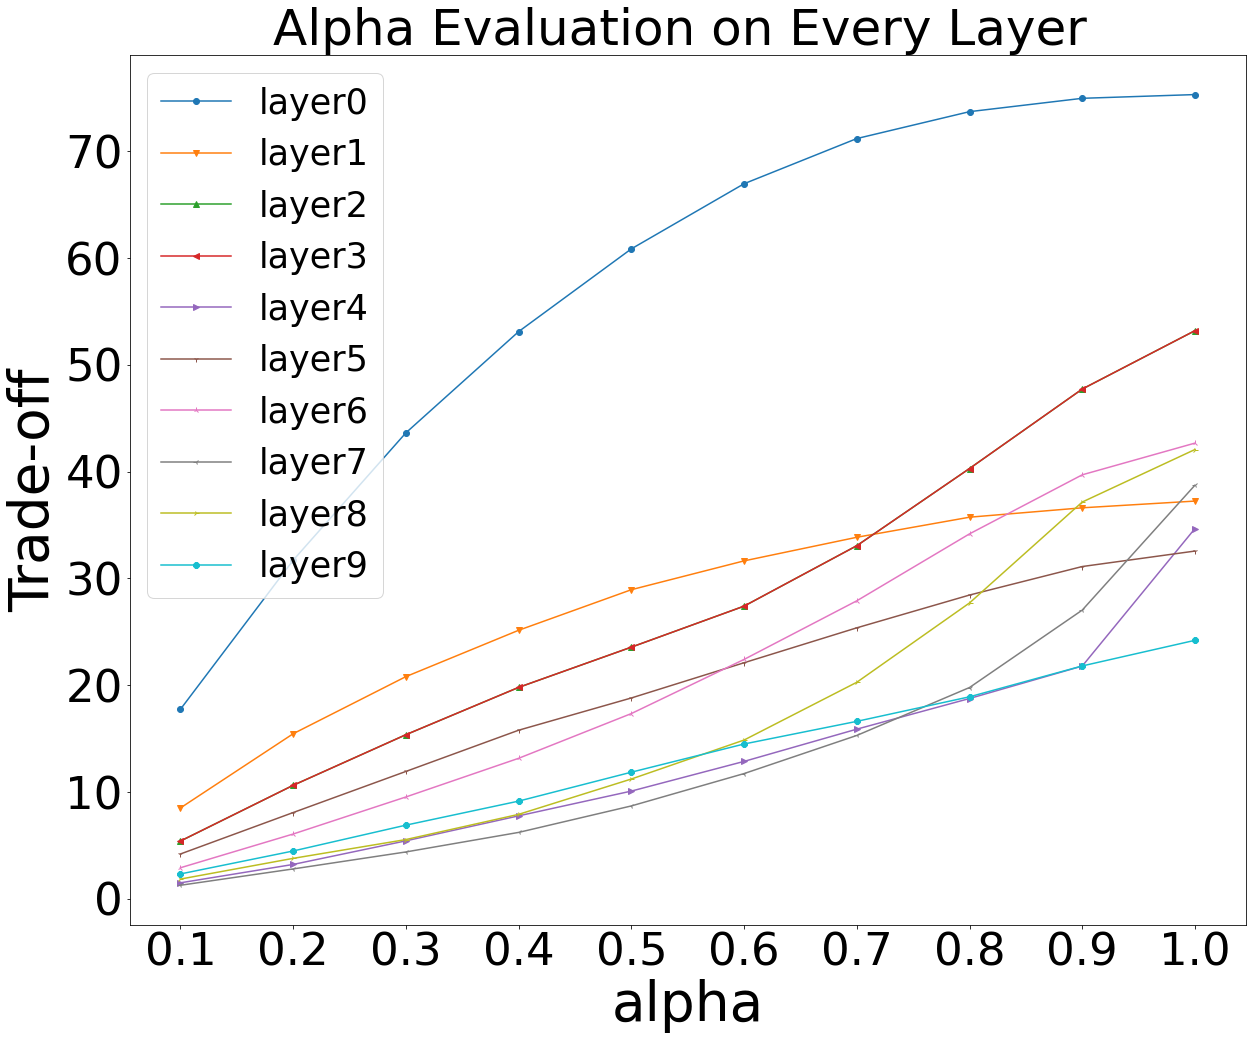

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
labels=[]
from matplotlib.lines import Line2D
markers=list(Line2D.markers.keys())[2:18]
for j  in range(len(alpha_metrics)):
    plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], [float(i) for i in alpha_metrics[j]],label="layer"+str(j),marker=markers[j])
    labels.append("layer"+str(j))
    
plt.xlabel('Cumilative Filtred Actions')
plt.legend(labels,fontsize=35)
plt.xlabel('alpha', fontsize=55)
plt.ylabel('Trade-off', fontsize=55)
plt.yticks(fontsize=45)
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],fontsize=45)
plt.title('Alpha Evaluation on Every Layer ',fontsize=50)
plt.show()

# Density After Actions Plot (figure 9 (b) in the Paper

In [15]:
import pickle 
with open('./data/'+dataset+'_after.pickle', 'rb') as handle:
        density_after = pickle.load(handle)

In [16]:
a,b,d,c=density_after

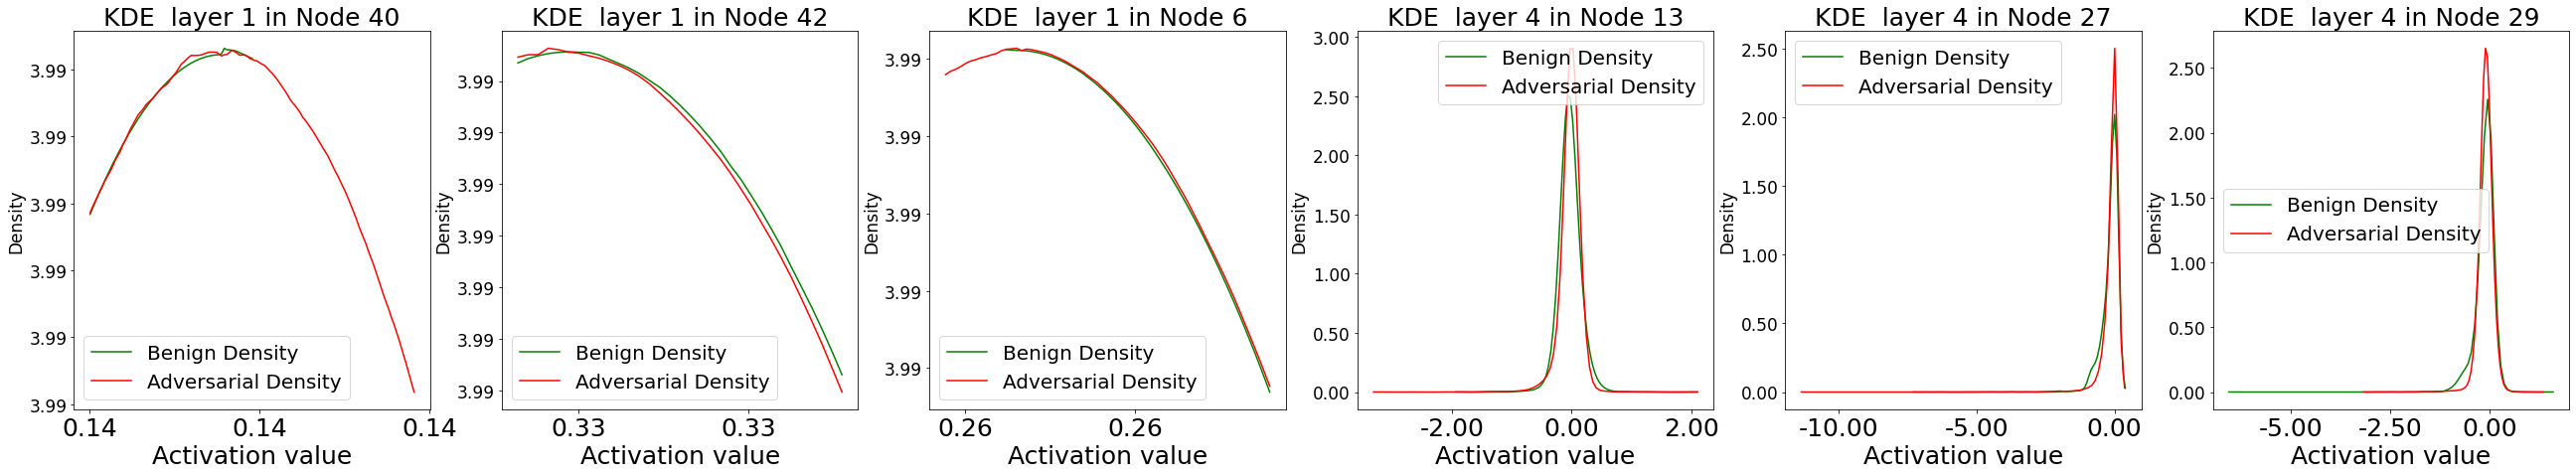

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#for layer_number in range(len(selected_layers)):
#num_rows = (len(layers_act_std[selected_layers[layer_number]])//5) +1
num_cols = 6
fig, axes = plt.subplots(1, num_cols,figsize=(45, 7))
axes = axes.flatten()
#jump=len(layers_act_std[selected_layers[layer_number]])//50
for i in range(len(axes)):
    ax=axes[i]
    if i<3:
        # Generate sample data (replace this with your own dataset)
        data_ben =a[node_id[i]]
        data_adv =b[node_id[i]]
    else:
        data_ben =d[node_id[i]]
        data_adv =c[node_id[i]]

    data_ben=data_ben.detach().numpy()
    data_adv=data_adv.detach().numpy()
    # Reshape the data to a column vector
    data_ben = data_ben.reshape(-1, 1)
    data_adv = data_adv.reshape(-1, 1)
    # Fit KDE model
    kde_ben = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde_adv = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde_ben.fit(data_ben)
    kde_adv.fit(data_adv)
    x_vals_ben = np.linspace(min(data_ben), max(data_ben), 100)
    x_vals_adv= np.linspace(min(data_adv), max(data_adv), 100)
    log_density_ben = kde_ben.score_samples(x_vals_ben)
    log_density_adv = kde_adv.score_samples(x_vals_adv)
    density_values_ben = np.exp(log_density_ben)
    density_values_adv = np.exp(log_density_adv)
    """
    # Find local maxima indices
    local_maxima_indices = argrelextrema(density_values, np.greater)[0]
    if len(local_maxima_indices)==0:
        local_maxima_indices=[np.argmax(density_values)]
    elif density_values[local_maxima_indices].max()<np.argmax(density_values):
        local_maxima_indices = np.append(local_maxima_indices, np.argmax(density_values))

    # Parametrize the window size based on the ratio of density
    window_ratios = 0.95

    # Extract the region around each peak with neighbors having a density ratio > 0.8
    peaks_regions = []

    for index in local_maxima_indices:
        # Check if all neighboring values have a density ratio > 0.8
        peaks_region=x_vals[(density_values> window_ratios * density_values[index]) & (density_values< density_values[index])]
        peaks_regions.append(peaks_region)

    # Flatten the list of regions
    """
    ax.plot(x_vals_ben, density_values_ben, color='green', label='Ben Density')
    ax.plot(x_vals_adv, density_values_adv, color='red', label='Adv Density')
    #ax.scatter(x_vals[local_maxima_indices], density_values[local_maxima_indices], color='red', label='Peaks')

    # Set plot labels and title
    ax.set_title('KDE '+str(selected_layers[layer_number[i]])+' in Node '+ str(node_id[i]),fontsize=25)#+ "number of peaks "+str(len(local_maxima_indices)) )
    ax.set_xlabel('Activation value',fontsize=25)
    #ax.xticks(fontsize=20)
    #ax.yticks(fontsize=20)
    ax.set_ylabel('Density',fontsize=17)
    def format_func(value, tick_number):
    # Convert the tick value to string without scientific notation
        return f'{value:.2f}'
    ax.tick_params(axis='x', labelsize=25)  # Set the font size for the x-axis tick labels
    ax.tick_params(axis='y', labelsize=17) 
    # Apply custom formatter to both x and y axes
    ax.xaxis.set_major_formatter(FuncFormatter(format_func))
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Display legend
    ax.legend(['Benign Density','Adversarial Density'], fontsize=20)
    #plot_act(layers_act[selected_layer][sorted_lists[-(i+1)*jump][1]],ax,std_score=sorted_lists[-(i+1)*jump][0])
#plt.savefig("Ember_after"+".pdf")
plt.show()
